## Viewing Spectral Profiler Data

In [1]:
import libpysat as psat
from libpysat.examples import get_path

% pylab inline

/home/jlaura/anaconda3/envs/libpysat/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib


In [2]:
s = psat.Spectra.from_spectral_profiler(get_path('SP_2C_02_02358_S138_E3586.spc'))

In [3]:
s.head(4)

,,512.6,518.4,524.7,530.4,536.5,542.8000000000001,548.7,554.5,560.5,566.7,...,CALIBRATION,SP_PELTIER,TC_MI_STATUS,CLOCK_COUNT_ERR_FLAG,SPATIAL_RESOLUTION_FLAG,GEOMETRIC_INFO_RECAL_FLAG,SUPPORT_IMAGE_LINE_POSITION,SUPPORT_IMAGE_COLUMN_POSITION,THUMBNAIL_LINE_POSITION,THUMBNAIL_COLUMN_POSITION
minor,id,,,,,,,,,,,,,,,,,,,,,
RAW,0,5123.0000,5887.0000,6375.0000,6806.0000,7494.0000,7585.0000,7525.0000,7860.0000,8582.0000,9196.0000,...,0,1,1,0,65,67,27,480,13,228
REF1,0,0.0402,0.0487,0.0497,0.0520,0.0532,0.0551,0.0559,0.0571,0.0594,0.0612,...,0,1,1,0,65,67,27,480,13,228
REF2,0,0.0397,0.0482,0.0492,0.0515,0.0527,0.0545,0.0553,0.0565,0.0588,0.0605,...,0,1,1,0,65,67,27,480,13,228
QA,0,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,288.0000,...,0,1,1,0,65,67,27,480,13,228


## Access the REF data

In [4]:
subs = s.get['REF1', :,  700:1600]
subs.head(5)

major     704.7   710.8   716.7   722.7   728.7   734.7   740.7   746.8   \
minor id                                                                   
REF1  0   0.0809  0.0819  0.0830  0.0832  0.0844  0.0842  0.0861  0.0858   
      1   0.0833  0.0843  0.0855  0.0858  0.0869  0.0867  0.0887  0.0883   
      2   0.0793  0.0803  0.0814  0.0817  0.0828  0.0825  0.0845  0.0841   
      3   0.0797  0.0806  0.0818  0.0820  0.0832  0.0830  0.0849  0.0846   
      4   0.0799  0.0809  0.0821  0.0822  0.0834  0.0833  0.0852  0.0849   

major     752.8   758.7    ...    1523.8  1531.7  1539.7  1547.7  1555.5  \
minor id                   ...                                             
REF1  0   0.0864  0.0872   ...    0.1673  0.1681  0.1697  0.1692  0.1710   
      1   0.0890  0.0898   ...    0.1696  0.1705  0.1719  0.1714  0.1731   
      2   0.0848  0.0856   ...    0.1655  0.1662  0.1676  0.1672  0.1689   
      3   0.0852  0.0860   ...    0.1648  0.1656  0.1672  0.1668  0.1685   
      4   0.0855  0.0862   ...    0.1694  0.1702  0.1720  0.1715  0.1731   

major     1563.7  1571.7  1579.6  1587.7  1595.7  
minor id                                          
REF1  0   0.1698  0.1699  0.1716  0.1759  0.1733  
      1   0.1721  0.1717  0.1736  0.1777  0.1751  
      2   0.1679  0.1677  0.1693  0.1736  0.1712  
      3   0.1675  0.1672  0.1690  0.1734  0.1708  
      4   0.1724  0.1721  0.1741  0.1785  0.1759  

[5 rows x 122 columns]

## Continuum Correct the Data


In [5]:
a = subs.continuum_correction(nodes=[704, 1595])
a = a.get[:,700:1600]  # This is due to a bug as well.

In [6]:
a.head(5)

major,704.7,710.8000000000001,716.7,722.7,728.7,734.7,740.7,746.8000000000001,752.8000000000001,758.7,...,1523.8000000000002,1531.7,1539.7,1547.7,1555.5,1563.7,1571.7,1579.6000000000001,1587.7,1595.7
0,1.0,1.004506,1.010415,1.005236,1.012125,1.002248,1.017330,1.006264,1.005960,1.008092,...,1.008781,1.008622,1.013179,1.005215,1.011050,0.998932,0.994666,0.999823,1.019885,1.0
1,1.0,1.004427,1.011399,1.007580,1.013143,1.003578,1.019434,1.007559,1.008433,1.010537,...,1.011377,1.011833,1.015176,1.007320,1.012528,1.001729,0.994628,1.000916,1.019648,1.0
2,1.0,1.004639,1.010707,1.006696,1.012529,1.001283,1.017911,1.005472,1.006395,1.008605,...,1.010477,1.009727,1.013154,1.005719,1.011052,1.000003,0.993928,0.998588,1.018930,1.0
3,1.0,1.003440,1.010788,1.005636,1.012734,1.002811,1.018220,1.007089,1.006878,1.009138,...,1.008268,1.008180,1.012877,1.005472,1.010860,0.999832,0.993192,0.999090,1.020108,1.0
4,1.0,1.004255,1.011172,1.004406,1.011082,1.002017,1.016964,1.005495,1.004907,1.005621,...,1.007415,1.007075,1.012561,1.004520,1.008925,0.999697,0.992995,0.999625,1.019778,1.0


## Visualization: Plotting the Corrected Continuum

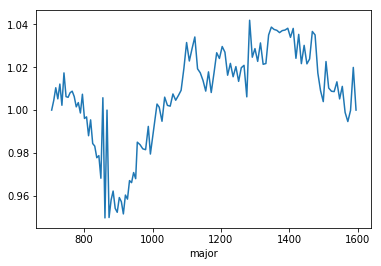

In [7]:
a.get[0].plot()

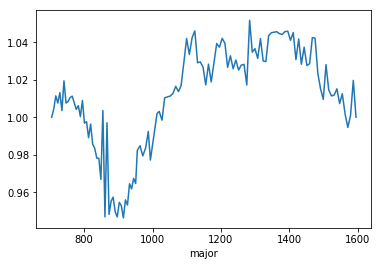

In [8]:
a.get[1].plot()

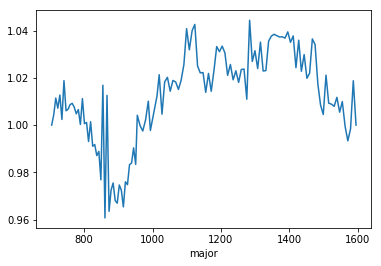

In [10]:
a.get[37].plot()

# Transformations: Methods to Alter the Spectrum

In [26]:
from libpysat.transform.utils import boxcar

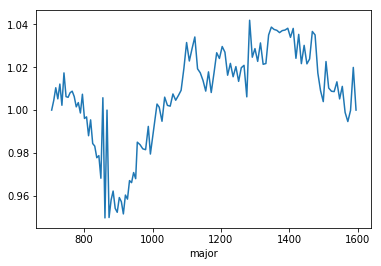

In [36]:
a.get[0].plot()

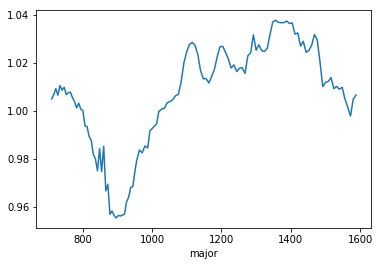

In [32]:
b = boxcar(a.get[0])
b = b.iloc[1:-1]
b.plot()

## Horgan Analytics 
Here we demonstrate the application of some analysis methods published by Briony Horgan.

In [28]:
from libpysat.transform.utils import band_area, band_asymmetry, band_center, band_minima

### Find the band minima between two end members

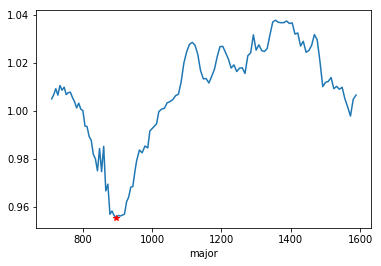

In [35]:
center, wv = band_minima(b, 800, 1000)
b.plot()
plot(center, wv, 'r*')

### Fit an nth degree polynomial to band center

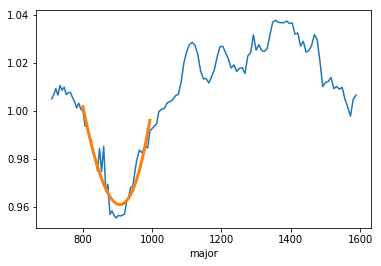

In [45]:
center, center_fit = band_center(b, 800, 1000)
b.plot()
center_fit.plot(linewidth=3)

### Area under 1um

In [44]:
band_area(b, 750, 1000)

-29.18381281770435